# Movie Crawling 
## 리뷰 크롤링

In [136]:
import os
import re
from urllib.request import urlopen
from urllib.request import urlretrieve
from urllib.parse import quote
from urllib.error import HTTPError
from bs4 import BeautifulSoup
from operator import eq

In [2]:
def getBs(url): # html data 추출 
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bs = BeautifulSoup(html, 'html.parser')
    except AttributeError as e:
        return None
    return bs

In [3]:
need_data = ['title영화 제목','story줄거리','actors주연 배우','director감독',
             'poster포스터 이미지','poster_url포스터 URL','wordcloud 이미지',
             'premier영화 개봉일','score평점']s

In [160]:
def get_moviechart(limit): # 영화 순위 리스트 추출
    page=1
    base_url = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=pnt&date=99999999&page='
    moviehome = 'https://movie.naver.com'
    count = 0
    movie_list = list()
    while True:
        url = base_url+str(page)
        bs = getBs(url)
        movies = bs.find('table').findAll('a',{'href':re.compile('/movie/bi/mi/basic.nhn*')})
        
        for movie in movies:
            print(movie.get_text())
            movie_list.append(moviehome+movie.attrs['href'])
        count += 1
        page += 1
        if count>limit:
            break
            
    return movie_list


그린 북
가버나움
베일리 어게인
주전장
아일라
원더
당갈
쇼생크 탈출
터미네이터 2:오리지널
보헤미안 랩소디
덕구
월-E
나 홀로 집에
인생은 아름다워
빽 투 더 퓨쳐
살인의 추억
매트릭스
포레스트 검프
라이언 일병 구하기
사운드 오브 뮤직
글래디에이터
헬프
안녕 베일리
알라딘
어벤져스: 엔드게임
토이 스토리 3
센과 치히로의 행방불명
위대한 쇼맨
헌터 킬러
클래식
죽은 시인의 사회
아이 캔 스피크
레옹
반지의 제왕: 왕의 귀환
동주
캐스트 어웨이
굿바이 마이 프랜드
여인의 향기
주토피아
히든 피겨스
집으로...
세 얼간이
클레멘타인
타이타닉
쉰들러 리스트
지금, 만나러 갑니다
서유기 2 - 선리기연
굿 윌 헌팅
모노노케 히메
언터처블: 1%의 우정
울지마 톤즈
에이리언 2
아마데우스
그대를 사랑합니다
다크 나이트
아이언 자이언트
다시 태어나도 우리
패왕별희
반지의 제왕: 두 개의 탑
트루먼 쇼
드래곤 길들이기
사랑의 선물
폴란드로 간 아이들
달링
미세스 다웃파이어
더 록
알라딘
아이 엠 샘
라푼젤
러브 유어셀프 인 서울
프리퀀시
모던 타임즈
소원
해리 포터와 죽음의 성물 - 2부
번 더 스테이지: 더 무비
지상의 별처럼
나 홀로 집에 2 - 뉴욕을 헤매다
피아니스트
빌리 엘리어트
업
코러스
주먹왕 랄프
바이센테니얼 맨
블라인드 사이드
언더독
오세암
미스 슬로운
우리들의 일그러진 영웅
아기공룡 둘리 - 얼음별 대모험
로망
토이 스토리
쥬라기 공원
라따뚜이
천공의 성 라퓨타
일급 살인
내 이름은 칸
시네마 천국
에이 아이
자백
폴리스 스토리
퀸 락 몬트리올
록키
타잔
영웅: 샐러멘더의 비밀
천국의 아이들
다이 하드
허스토리
천녀유혼
바람계곡의 나우시카
뷰티풀 투모로우
반지의 제왕: 반지 원정대
라이온 킹
세상에서 가장 아름다운 이별
뽀로로 극장판 보물섬 대모험
빌리 엘리어트 뮤지컬 라이브
엽기적인 그녀
몬스터 주식회사 3D
맨발의 꿈
교회오빠
말할 수 없는 비밀
트와이스랜드
바람
동방불패
메리 포핀스
공동경비구역 JSA
취권 2
프리 윌리
도가니
에이트 빌로우


'https://movie.naver.com/movie/bi/mi/basic.nhn?code=169240'

In [163]:
def get_movieinfo(url): # 영화 정보 추출
    
    movie_info = list()
    
    base_url = url
    code =base_url[base_url.find('code=')+5:]
    
    
    detail_url = 'https://movie.naver.com/movie/bi/mi/detail.nhn?code='
    bs = getBs(base_url)
    
    # 제목
    title = get_title(code)
    
    #poster
    poster = get_posturl(code)
    
    # 관람객 평점
    score = bs.find('span',{'class':'st_off'}).get_text()

    
    ## 줄거리
    con_tx = bs.find('p',{'class':'con_tx'})
    story = con_tx.get_text().replace('\xa0','').replace('\r','')

    ## 개봉일
    data = bs.findAll('a',{'href':re.compile('/movie/sdb/browsing/bmovie.nhn*')})
    day = list()
    for info in data:
        if '/movie/sdb/browsing/bmovie.nhn?open' in info.attrs['href']:
            now = info.get_text().replace(' ','')
            if now in day:
                pass
            else:
                day.append(now)
    day = ''.join(day)
    
    
    # 배우
    bs = getBs(detail_url+code)

    name = bs.findAll('div',{'class','p_info'})
    actors = list()

    for actor in name:
        part = actor.find('em',{'class':'p_part'}).get_text()
        if part == '주연':
            actors.append(actor.a.get_text())
    
    
    # 감독
    d_name = bs.findAll('div',{'class':'dir_obj'})
    director = list()
    for d in d_name:
        director.append(d.div.a.get_text())
    
    
    
    movie_info.append(title)
    movie_info.append(story)
    movie_info.append(actors)
    movie_info.append(director)
    movie_info.append(poster)
    movie_info.append(day)
    movie_info.append(score)
    

    text = ''

    for data in movie_info:
        if type(data) == str:
            text+=''.join(data)
        else:
            text+=','.join(data)
        text+='\n'
    
    print(text)

    f = open(title+'/'+title+'.txt','w',-1, "utf-8")
    f.write(text)
    f.close()
    
    return movie_info

get_movieinfo('https://movie.naver.com/movie/bi/mi/basic.nhn?code=157243')

당갈
전직 레슬링 선수였던 ‘마하비르 싱 포갓(아미르 칸)’은 아버지의 반대로 금메달의 꿈을 이루지 못한 채 레슬링을 포기한다.아들을 통해 꿈을 이루겠다는 생각은 내리 딸만 넷이 태어나면서 좌절된다.그러던 어느 날, 두 딸이 또래 남자아이들을 신나게 때린 모습에서 잠재력을 발견하고 레슬링 특훈에 돌입한다.사람들의 따가운 시선과 조롱에도 불구하고 첫째 기타(파티마 사나 셰이크)와 둘째 바비타(산야 말호트라)는아버지의 훈련 속에 재능을 발휘, 승승장구 승리를 거두며 국가대표 레슬러로까지 성장해 마침내 국제대회에 출전하는데...
아미르 칸,파티마 사나 셰이크,산야 말호트라
니테쉬 티와리
https://movie-phinf.pstatic.net/20180329_2/1522287706725roSen_JPEG/movie_image.jpg
2018.04.25
관람객 평점 9.62점



['당갈',
 '전직 레슬링 선수였던 ‘마하비르 싱 포갓(아미르 칸)’은 아버지의 반대로 금메달의 꿈을 이루지 못한 채 레슬링을 포기한다.아들을 통해 꿈을 이루겠다는 생각은 내리 딸만 넷이 태어나면서 좌절된다.그러던 어느 날, 두 딸이 또래 남자아이들을 신나게 때린 모습에서 잠재력을 발견하고 레슬링 특훈에 돌입한다.사람들의 따가운 시선과 조롱에도 불구하고 첫째 기타(파티마 사나 셰이크)와 둘째 바비타(산야 말호트라)는아버지의 훈련 속에 재능을 발휘, 승승장구 승리를 거두며 국가대표 레슬러로까지 성장해 마침내 국제대회에 출전하는데...',
 ['아미르 칸', '파티마 사나 셰이크', '산야 말호트라'],
 ['니테쉬 티와리'],
 'https://movie-phinf.pstatic.net/20180329_2/1522287706725roSen_JPEG/movie_image.jpg',
 '2018.04.25',
 '관람객 평점 9.62점']

In [120]:
def get_category(bs,main_url): # 영화 카테고리 추출
    #data = bs.table.findAll('a')
    data = bs.findAll('a',{'href':re.compile('bmovie.nhn*')})
    category = {}
    for item in data:
        name = item.get_text() # 카테고리 내용
        name = name.replace(' ','') # 공백 제거
        #print(name,end='')
        url = main_url+item.attrs['href'] # 카테고리 주소 
        #print(' : ',url)
        category[name]=url 
        
    return category
        

In [7]:
def get_movie(url): # 카테고리 내부 영화 추출
    main_url = 'https://movie.naver.com'
    page = '&page=' # 페이지 설정
    page_num = 1
    movie ={}
    while True:
        bs = getBs(url+page+str(page_num))
        
            
            
        movies = bs.find('ul',{'class':'directory_list'}).findAll('li') # 영화 리스트 담긴 테그 추출
        
        for item in movies:
            m = item.find('a',{'href':re.compile('/movie*')}) # 쓸대 없는 테그 제거
            if m is None: # 원하는 정보가 없는 테그
                pass
            else:
                #print(m)
                movie[m.get_text()] = main_url+m.attrs['href']
        
        if bs.find('td',{'class':'next'}) is None: # 다음 페이지 유무 체크
            break
        page_num+=1
    
    
    return movie
    
    
    

In [164]:
def get_txtfile(rev,filename): # 리뷰 텍스트 파일 생성
    text = ' '.join(rev)
    path = filename+'/'
    f = open(path+filename+'_rev'+'.txt','w',-1, "utf-8")
    
    f.write(text)
    f.close()

In [9]:
def get_rev(url,limit): # 영화 리뷰 추출
    code = url[url.find('code='):]
    sub_url_front= 'https://movie.naver.com/movie/bi/mi/pointWriteFormList.nhn?'
    sub_url_back = '&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page='
    page = 1
    target = sub_url_front+code+sub_url_back+str(page)
    bs = getBs(target)
    count = 0
    
    rev = list()
    while True:
        print('craw'+str(page)+'page')
        review_data = bs.findAll('span',{'id':re.compile('_filtered_ment_*')})
    
    
        for i in review_data:
            #print(i.get_text().strip())
            rev.append(i.get_text().strip())
        
        count+=1
        page +=1
        target = sub_url_front+code+sub_url_back+str(page)
        bs = getBs(target)
        
        if bs.find('a',{'title':'다음'}) is None:
            print('no data')
            break
        elif count >= limit:
            print('limit')
            break
    
    
    
    return rev
    

In [10]:
def get_title(code): # 영화 제목 추출
    url = 'https://movie.naver.com/movie/bi/mi/point.nhn?code='+code
    
    bs = getBs(url)
    title = bs.find('h3',{'class':'h_movie'}).a.get_text()
    
    title = list(title)
    stopchar = ['/',':','*','?','<','>','|','"']
    
    for i in stopchar:
        if i in title:
            title.remove(i)
    
 
    title = ''.join(title)
    
    return title

get_title('167613')

'조커'

In [89]:
def get_postimg(code):# 영화 이미지 파일 생성
    #code = 179482
    url = 'https://movie.naver.com/movie/bi/mi/photoViewPopup.nhn?movieCode='+code
    title = get_title(code)
    bs = getBs(url)
    img_src = bs.find('img',{'id':'targetImage'})
    downlink = img_src.attrs['src']
    urlretrieve(downlink,title+'/'+title+'.jpg')
    
    

def get_posturl(code): # 영화 이미지 주소
    url = 'https://movie.naver.com/movie/bi/mi/photoViewPopup.nhn?movieCode='+code
    title = get_title(code)
    bs = getBs(url)
    img_src = bs.find('img',{'id':'targetImage'})
    downlink = img_src.attrs['src']
    return downlink

In [12]:
def get_data(url):# 영화 
    code = url[url.find('code=')+5:]
    print('code : '+code)
    
    title = get_title(code)
    print('title : '+title)
    


    os.makedirs(title) # 타이틀 이름 중 안되는 문자 제거할 것
                       # \ / : * ? " < > |
    
    
    get_postimg(code)
    rev = get_rev(url,1000)
    
    get_txtfile(rev,title)
    
    return title
    

In [56]:
get_data(url)

code : 136900
title : 어벤져스 엔드게임
craw1page
craw2page
craw3page
craw4page
craw5page
craw6page
craw7page
craw8page
craw9page
craw10page
craw11page
craw12page
craw13page
craw14page
craw15page
craw16page
craw17page
craw18page
craw19page
craw20page
craw21page
craw22page
craw23page
craw24page
craw25page
craw26page
craw27page
craw28page
craw29page
craw30page
craw31page
craw32page
craw33page
craw34page
craw35page
craw36page
craw37page
craw38page
craw39page
craw40page
craw41page
craw42page
craw43page
craw44page
craw45page
craw46page
craw47page
craw48page
craw49page
craw50page
craw51page
craw52page
craw53page
craw54page
craw55page
craw56page
craw57page
craw58page
craw59page
craw60page
craw61page
craw62page
craw63page
craw64page
craw65page
craw66page
craw67page
craw68page
craw69page
craw70page
craw71page
craw72page
craw73page
craw74page
craw75page
craw76page
craw77page
craw78page
craw79page
craw80page
craw81page
craw82page
craw83page
craw84page
craw85page
craw86page
craw87page
craw88page
craw89pag

craw691page
craw692page
craw693page
craw694page
craw695page
craw696page
craw697page
craw698page
craw699page
craw700page
craw701page
craw702page
craw703page
craw704page
craw705page
craw706page
craw707page
craw708page
craw709page
craw710page
craw711page
craw712page
craw713page
craw714page
craw715page
craw716page
craw717page
craw718page
craw719page
craw720page
craw721page
craw722page
craw723page
craw724page
craw725page
craw726page
craw727page
craw728page
craw729page
craw730page
craw731page
craw732page
craw733page
craw734page
craw735page
craw736page
craw737page
craw738page
craw739page
craw740page
craw741page
craw742page
craw743page
craw744page
craw745page
craw746page
craw747page
craw748page
craw749page
craw750page
craw751page
craw752page
craw753page
craw754page
craw755page
craw756page
craw757page
craw758page
craw759page
craw760page
craw761page
craw762page
craw763page
craw764page
craw765page
craw766page
craw767page
craw768page
craw769page
craw770page
craw771page
craw772page
craw773page
craw

그린 북
가버나움
베일리 어게인
주전장
아일라
원더
당갈
쇼생크 탈출
터미네이터 2:오리지널
보헤미안 랩소디
덕구
월-E
나 홀로 집에
인생은 아름다워
빽 투 더 퓨쳐
살인의 추억
매트릭스
포레스트 검프
라이언 일병 구하기
사운드 오브 뮤직
글래디에이터
헬프
안녕 베일리
알라딘
어벤져스: 엔드게임
토이 스토리 3
센과 치히로의 행방불명
위대한 쇼맨
헌터 킬러
클래식
죽은 시인의 사회
아이 캔 스피크
레옹
반지의 제왕: 왕의 귀환
동주
캐스트 어웨이
굿바이 마이 프랜드
여인의 향기
주토피아
히든 피겨스
집으로...
세 얼간이
클레멘타인
타이타닉
쉰들러 리스트
지금, 만나러 갑니다
서유기 2 - 선리기연
굿 윌 헌팅
모노노케 히메
언터처블: 1%의 우정
울지마 톤즈
에이리언 2
아마데우스
그대를 사랑합니다
다크 나이트
아이언 자이언트
다시 태어나도 우리
패왕별희
반지의 제왕: 두 개의 탑
트루먼 쇼
드래곤 길들이기
사랑의 선물
폴란드로 간 아이들
달링
미세스 다웃파이어
더 록
알라딘
아이 엠 샘
라푼젤
러브 유어셀프 인 서울
프리퀀시
모던 타임즈
소원
해리 포터와 죽음의 성물 - 2부
번 더 스테이지: 더 무비
지상의 별처럼
나 홀로 집에 2 - 뉴욕을 헤매다
피아니스트
빌리 엘리어트
업
코러스
주먹왕 랄프
바이센테니얼 맨
블라인드 사이드
언더독
오세암
미스 슬로운
우리들의 일그러진 영웅
아기공룡 둘리 - 얼음별 대모험
로망
토이 스토리
쥬라기 공원
라따뚜이
천공의 성 라퓨타
일급 살인
내 이름은 칸
시네마 천국
에이 아이
자백
폴리스 스토리
code : 171539
title : 그린 북
craw1page
craw2page
craw3page
craw4page
craw5page
craw6page
craw7page
craw8page
craw9page
craw10page
craw11page
craw12page
craw13page
craw14page
craw15page
craw16page
craw17page
craw18page
craw19page
craw20page
c

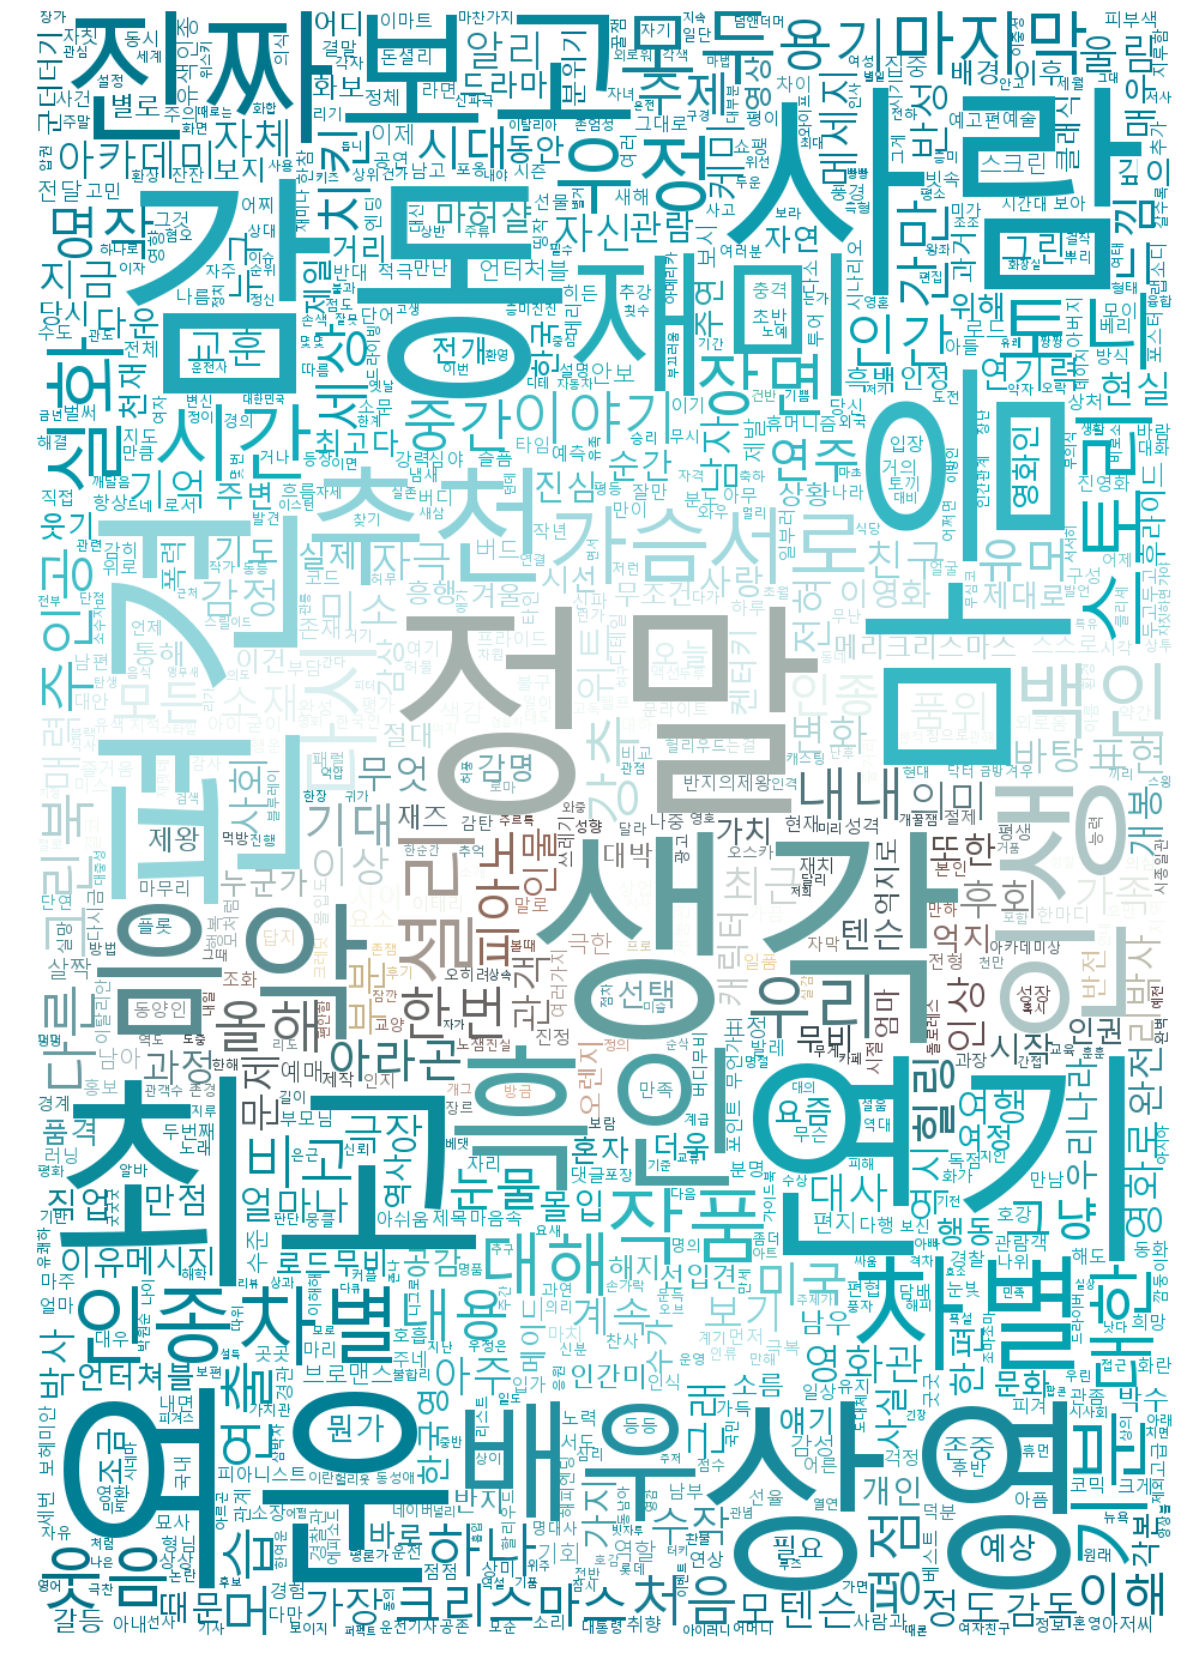

code : 174830
title : 가버나움
craw1page
craw2page
craw3page
craw4page
craw5page
craw6page
craw7page
craw8page
craw9page
craw10page
craw11page
craw12page
craw13page
craw14page
craw15page
craw16page
craw17page
craw18page
craw19page
craw20page
craw21page
craw22page
craw23page
craw24page
craw25page
craw26page
craw27page
craw28page
craw29page
craw30page
craw31page
craw32page
craw33page
craw34page
craw35page
craw36page
craw37page
craw38page
craw39page
craw40page
craw41page
craw42page
craw43page
craw44page
craw45page
craw46page
craw47page
craw48page
craw49page
craw50page
craw51page
craw52page
craw53page
craw54page
craw55page
craw56page
craw57page
craw58page
craw59page
craw60page
craw61page
craw62page
craw63page
craw64page
craw65page
craw66page
craw67page
craw68page
craw69page
craw70page
craw71page
craw72page
craw73page
craw74page
craw75page
craw76page
craw77page
craw78page
craw79page
craw80page
craw81page
craw82page
craw83page
craw84page
craw85page
craw86page
craw87page
craw88page
craw89page
cra

In [ ]:
chart = get_moviechart(1)

for movie in chart:
    title = get_data(movie)
    get_movieinfo(movie)
    word = get_word(title)
    get_wrodcloud(word,title)



# Word Cloud
## 워드 클라우드 이미지 생성

In [169]:
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from konlpy.corpus import kolaw
from konlpy.tag import Okt; t = Okt()

import matplotlib.pyplot as plt
import platform

from wordcloud import WordCloud
from konlpy.tag import Kkma
from wordcloud import ImageColorGenerator

import numpy as np
from PIL import Image
from wordcloud import STOPWORDS

from matplotlib import font_manager, rc

kkma = Kkma()

In [170]:
def get_word(title):
    text = open(title+'/'+title+'_rev'+'.txt','r',-1,"utf-8").read()
    tokens = t.nouns(text)

    # 1글자 , 영화 제거
    tokens = [word for word in tokens if len(word) > 1 and word != '영화']

    word = nltk.Text(tokens, name='영화 리뷰')
    
    return word

In [171]:
def get_wrodcloud(word,title):

    # 폰트설정
    if platform.system()  == 'Darwin':
        rc('font',family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:
        print('unknown system')
    
    %matplotlib inline

    data = word.vocab().most_common(1000)
    tmp_data = dict(data)
    
    movie_coloring = np.array(Image.open(title+'/'+title+'.jpg'))

    image_colors = ImageColorGenerator(movie_coloring)

    wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                         relative_scaling = 0.08, mask=movie_coloring,
                         background_color='white',max_words = 2000#,min_font_size=1,max_font_size=20,random_state=50
                         ).generate_from_frequencies(tmp_data)

    plt.figure(figsize=(30,30))
    plt.imshow(wordcloud.recolor(color_func=image_colors),interpolation='bilinear')
    plt.axis('off')
    plt.savefig(title+'/'+title+'_wordcloud'+'.png', format="png")
    plt.show()
